In [2]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# connect to my server
conn_str = (
    'mssql+pyodbc://DESKTOP-BE4DSUP\\M_TAHA/Customer_Management_sys'
    '?driver=ODBC+Driver+17+for+SQL+Server'
)

engine = create_engine(conn_str)

In [4]:
# The customers information 
query = '''select *
 from customer'''

# Load data into pandas 
customer_data = pd.read_sql(query, engine)

customer_data 

,customer_id,date_of_birth,gender,email,username,Account_password,FName,LName
0,1,1946-11-21,M,davisrobert@example.com,jenniferlutz,$cp15Bj^($,Zachary,Williams
1,2,1984-05-21,F,lmorgan@example.net,rhunt,fD6Yg5trs#,Christopher,Thomas
2,3,1972-05-15,F,rachelhernandez@example.org,eddielee,dw#q2JTxWR,Alicia,Mcintosh
3,4,1976-04-30,F,ccurry@example.com,nancymcdaniel,_1j1F32lKB,Joshua,Rogers
4,5,1969-03-18,M,kturner@example.org,gloverraymond,$O0Jjf&vkn,Marc,Francis
...,...,...,...,...,...,...,...,...
10995,10996,1946-01-28,F,louis07@example.net,brittanysloan,P77KGzgY@+,Gabriella,Wilcox
10996,10997,1972-10-12,F,kristenibarra@example.net,qstanley,(6Qtx6GwL1,Albert,Graves
10997,10998,1968-10-03,M,carrollduane@example.org,fdavis,dSXN0Hqlt),Vincent,Padilla
10998,10999,1983-05-18,M,vazquezjasmine@example.net,cochranlisa,5x24#7QrMC,Karen,Johnson


In [5]:
customer_data.shape 

(11000, 8)

In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       11000 non-null  int64 
 1   date_of_birth     11000 non-null  object
 2   gender            11000 non-null  object
 3   email             11000 non-null  object
 4   username          11000 non-null  object
 5   Account_password  11000 non-null  object
 6   FName             11000 non-null  object
 7   LName             11000 non-null  object
dtypes: int64(1), object(7)
memory usage: 687.6+ KB


In [7]:
def Pie(feature,Limit=10) : 
    global customer_data
    fig = plt.subplots(figsize=(10,6))
    plt.pie(customer_data[feature].value_counts()[:Limit]
            ,labels=list(customer_data[feature].value_counts()[:Limit].index),
            autopct ='%1.2f%%' ,
            labeldistance = 1.1,
            explode = [0.05 for i in range(len(customer_data[feature].value_counts()[:Limit]))] )
    plt.show()


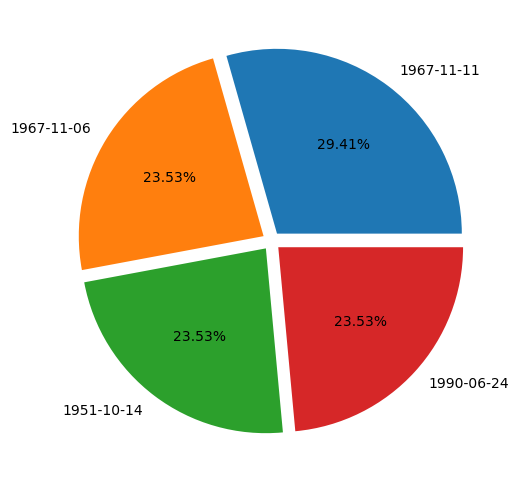

In [8]:
Pie('date_of_birth',4)

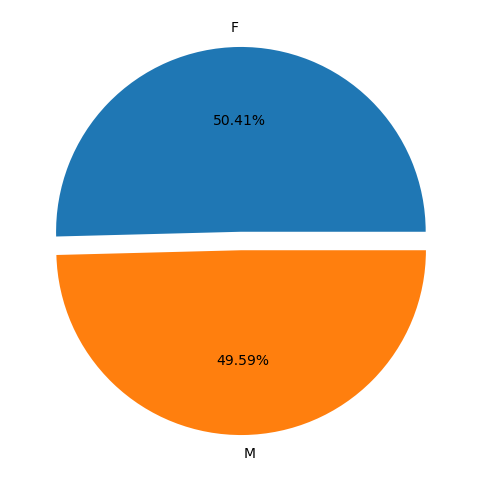

In [9]:
Pie('gender')

In [15]:
# the Transportation information 
query = '''exec clc_months '''
# Load data into pandas 
data = pd.read_sql(query, engine)
data

,Transaction_id,amount,currency,Transaction_type,payment_method,payment_status,customer_id,Transaction_Date,country,government,city,customer_id,months
0,1,4336,GBP,Refund,PayPal,Completed,3991,2020-10-16,Croatia,Nebraska,Lake Jeffreyborough,3991,october
1,1,4336,GBP,Refund,PayPal,Completed,3991,2020-10-16,Malaysia,Massachusetts,Briantown,3991,october
2,3,1164,USD,Purchase,Debit Card,Completed,565,2022-12-30,Lao People's Democra,Delaware,Schroederfurt,565,december
3,3,1164,USD,Purchase,Debit Card,Completed,565,2022-12-30,Madagascar,Alabama,Davidburgh,565,december
4,3,1164,USD,Purchase,Debit Card,Completed,565,2022-12-30,Palestinian Territor,Minnesota,Webbside,565,december
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11000,10999,792,EUR,Refund,Credit Card,Completed,5447,2021-03-20,Saint Kitts and Nevi,Montana,South Riley,5447,march
11001,10999,792,EUR,Refund,Credit Card,Completed,5447,2021-03-20,San Marino,Massachusetts,West Jasmine,5447,march
11002,11000,460,EUR,Purchase,Debit Card,Refunded,9429,2024-05-08,Malaysia,Kansas,West Kristinville,9429,may
11003,11000,460,EUR,Purchase,Debit Card,Refunded,9429,2024-05-08,Moldova,Virginia,Floreschester,9429,may


In [17]:
data.shape

(11005, 13)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11005 entries, 0 to 11004
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction_id    11005 non-null  int64 
 1   amount            11005 non-null  int64 
 2   currency          11005 non-null  object
 3   Transaction_type  11005 non-null  object
 4   payment_method    11005 non-null  object
 5   payment_status    11005 non-null  object
 6   customer_id       11005 non-null  int64 
 7   Transaction_Date  11005 non-null  object
 8   country           11005 non-null  object
 9   government        11005 non-null  object
 10  city              11005 non-null  object
 11  customer_id       11005 non-null  int64 
 12  months            11005 non-null  object
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [19]:
def Pie(feature,Limit=10) : 
    global data
    fig = plt.subplots(figsize=(10,6))
    plt.pie(data[feature].value_counts()[:Limit]
            ,labels=list(data[feature].value_counts()[:Limit].index),
            autopct ='%1.2f%%' ,
            labeldistance = 1.1,
            explode = [0.05 for i in range(len(data[feature].value_counts()[:Limit]))] )
    plt.show()


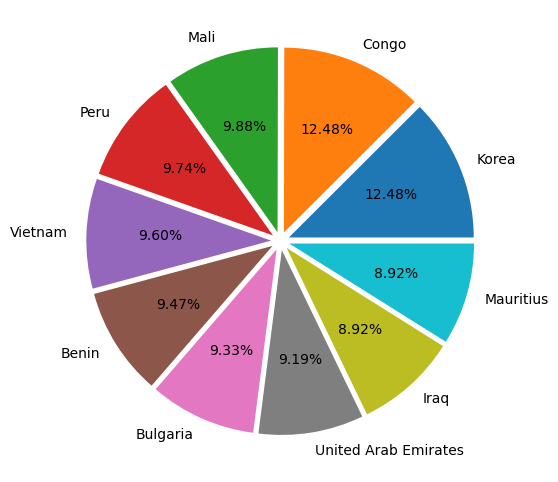

In [20]:
Pie('country')

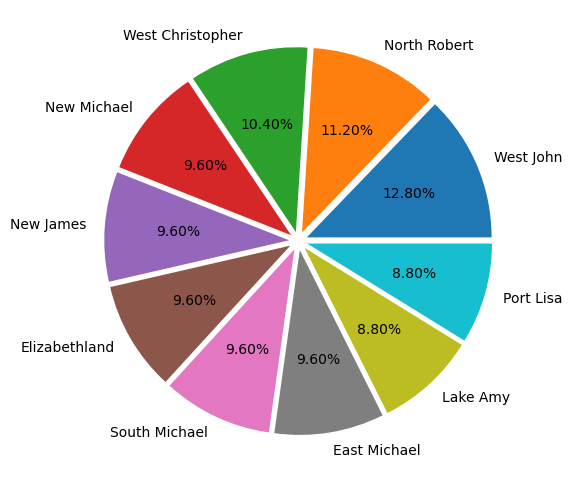

In [21]:
Pie('city')

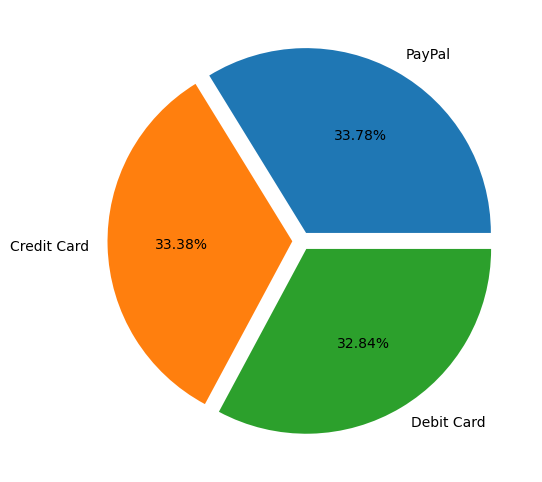

In [22]:
Pie('payment_method')

In [23]:
def SelectedFeaturePie(feature,Feature,Values,Limit=10) : 
    global data
    i=1
    fig= plt.subplots(figsize=(20,4))
    for index in Values:
        plt.subplot(1,3,i)
        plt.title(index)
        Data = data[data[Feature]==index]
        plt.pie(Data[feature].value_counts()[:Limit],labels=list(
            Data[feature].value_counts()[:Limit].index),
            autopct ='%1.2f%%' , labeldistance = 1.1,
                explode = [0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )
        i+=1

    plt.show()   

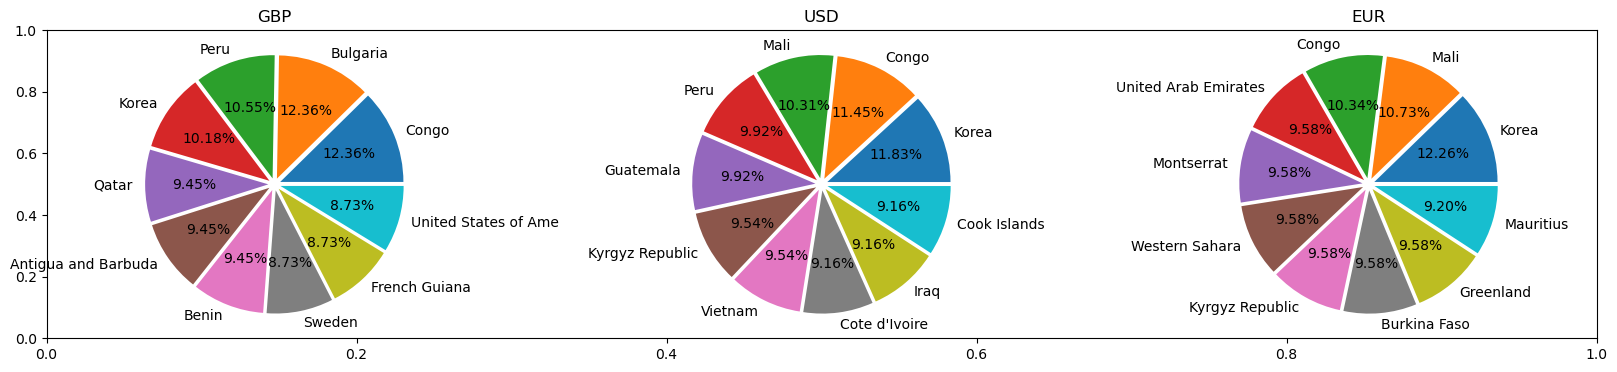

In [24]:
SelectedFeaturePie('country','currency',['GBP','USD','EUR'])

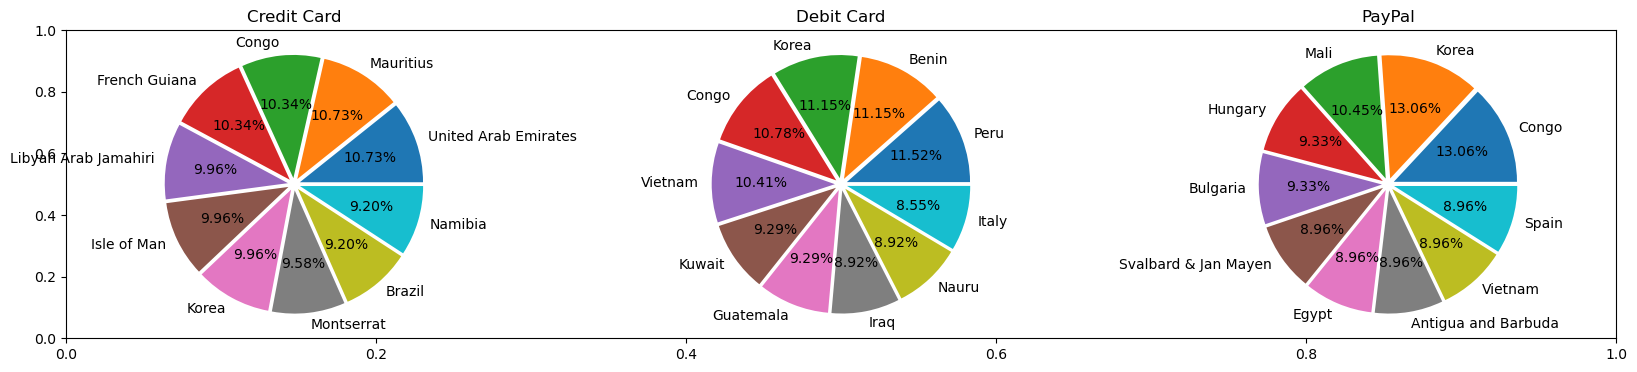

In [25]:
SelectedFeaturePie('country','payment_method',['Credit Card','Debit Card','PayPal'])

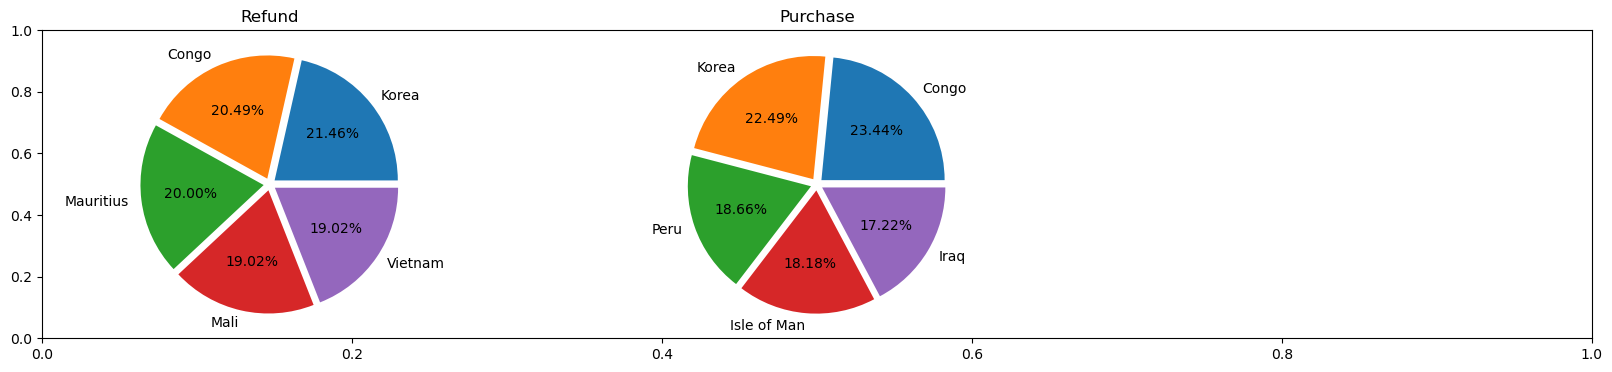

In [26]:
SelectedFeaturePie('country','Transaction_type',['Refund','Purchase'],5)

In [27]:
def SelectedMonths(feature, Feature, Values, Limit=5):
    global data
    fig, axes = plt.subplots(4, 3, figsize=(20, 12))  
    for i, index in enumerate(Values, 1):
        ax = plt.subplot(4, 3, i)
        ax.set_title(index)
        Data = data[data[Feature] == index]
        ax.pie(Data[feature].value_counts()[:Limit], 
               labels=Data[feature].value_counts()[:Limit].index,
               autopct='%1.2f%%', 
               labeldistance=1,
               explode=[0.1] * len(Data[feature].value_counts()[:Limit]))
    
    plt.tight_layout()
    plt.show()

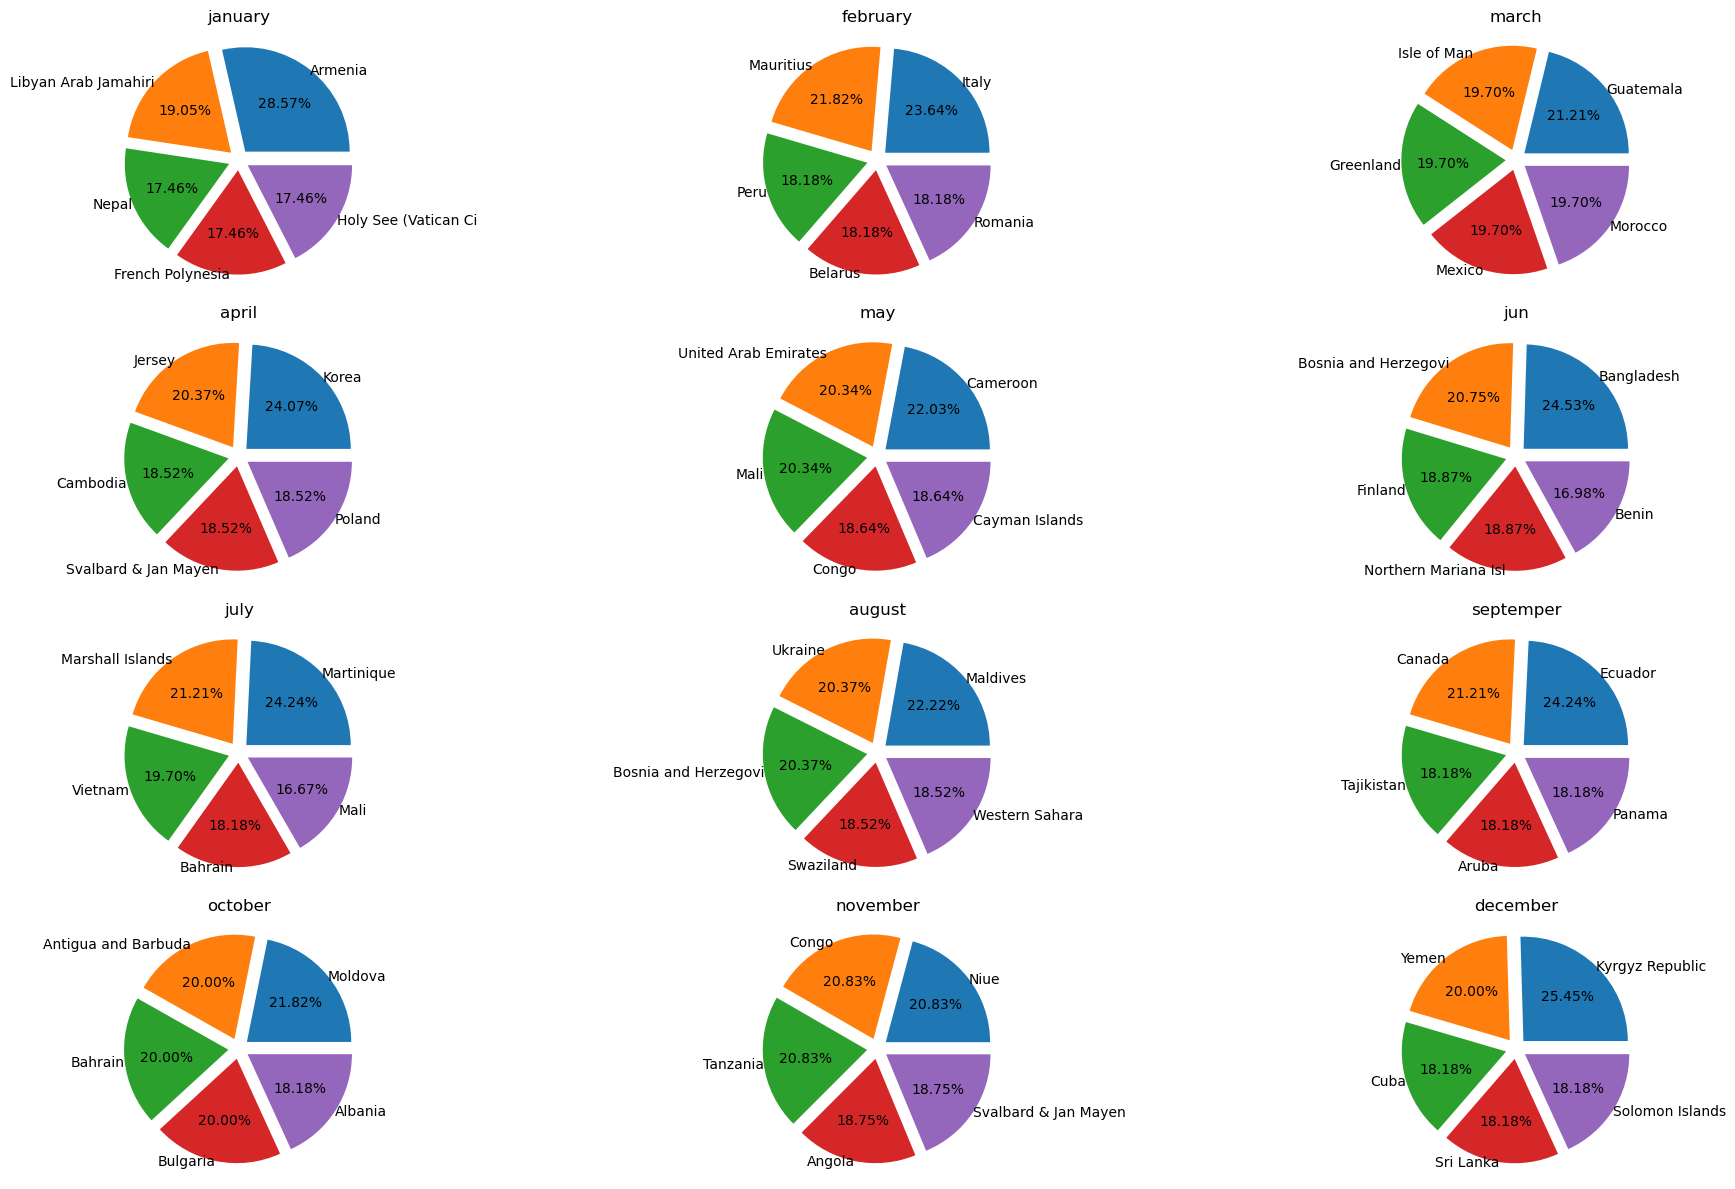

In [28]:
SelectedMonths('country','months',['january','february','march','april','may','jun','july','august','septemper','october','november','december'],5)

In [29]:
# interaction information 
query = '''select *
 from The_address ta join Interaction I 
 on ta.customer_id=I.customer_id'''

# Load data into pandas
data_interaction = pd.read_sql(query, engine)

data_interaction 

,country,government,city,customer_id,Interaction_id,interaction_type,interaction_outcome,follow_up_required,interaction_channel,follow_up_date,customer_id
0,Cayman Islands,Florida,Melissaview,3577,1,Complaint,Unresolved,Yes,Phone,2024-10-23,3577
1,French Guiana,North Carolina,Brownberg,3577,1,Complaint,Unresolved,Yes,Phone,2024-10-23,3577
2,Poland,Oklahoma,Robertsonview,3577,1,Complaint,Unresolved,Yes,Phone,2024-10-23,3577
3,Mauritania,Illinois,Port Curtismouth,3652,2,Support Request,Unresolved,No,Phone,2024-10-29,3652
4,Brunei Darussalam,Alaska,Lake David,10592,3,Feedback,Implemented,No,Phone,2024-10-17,10592
...,...,...,...,...,...,...,...,...,...,...,...
10949,Nepal,Oregon,Englishborough,4257,10997,Support Request,Implemented,Yes,Email,2024-10-29,4257
10950,Thailand,Delaware,West Caitlin,4257,10997,Support Request,Implemented,Yes,Email,2024-10-29,4257
10951,Senegal,Utah,Carterburgh,172,10999,Complaint,Pending,Yes,Phone,2024-10-11,172
10952,Benin,Missouri,Emilyton,6632,11000,Feedback,Resolved,Yes,Email,2024-10-31,6632


In [30]:
data_interaction.shape

(10954, 11)

In [31]:
data_interaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10954 entries, 0 to 10953
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   country              10954 non-null  object
 1   government           10954 non-null  object
 2   city                 10954 non-null  object
 3   customer_id          10954 non-null  int64 
 4   Interaction_id       10954 non-null  int64 
 5   interaction_type     10954 non-null  object
 6   interaction_outcome  10954 non-null  object
 7   follow_up_required   10954 non-null  object
 8   interaction_channel  10954 non-null  object
 9   follow_up_date       10954 non-null  object
 10  customer_id          10954 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 941.5+ KB


In [35]:
def Pie(feature,Limit=10) : 
    global data_interaction
    fig = plt.subplots(figsize=(10,6))
    plt.pie(data_interaction[feature].value_counts()[:Limit]
            ,labels=list(data_interaction[feature].value_counts()[:Limit].index),
            autopct ='%1.2f%%' ,
            labeldistance = 1.1,
            explode = [0.05 for i in range(len(data_interaction[feature].value_counts()[:Limit]))] )
    plt.show()


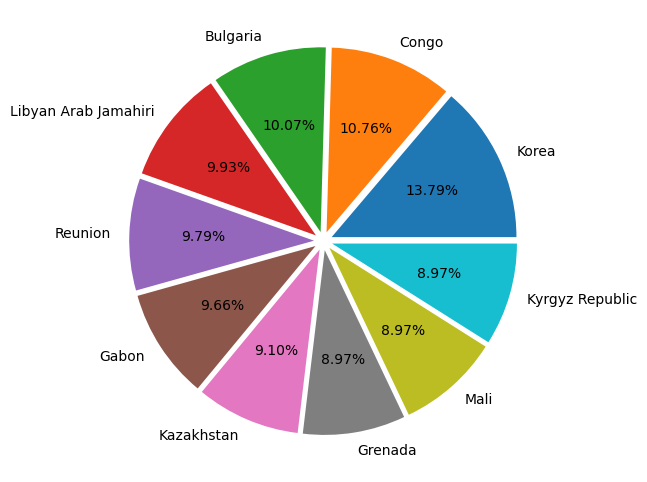

In [37]:
Pie('country')

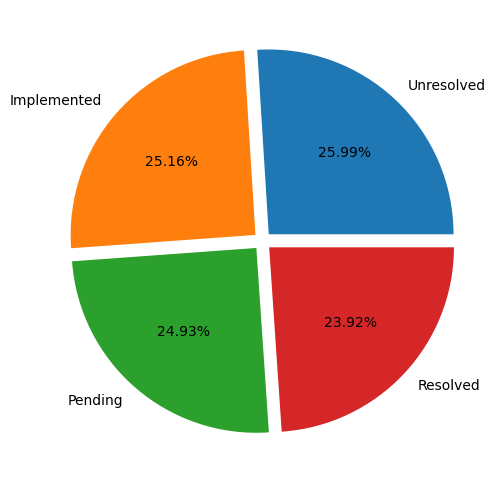

In [38]:
Pie('interaction_outcome')

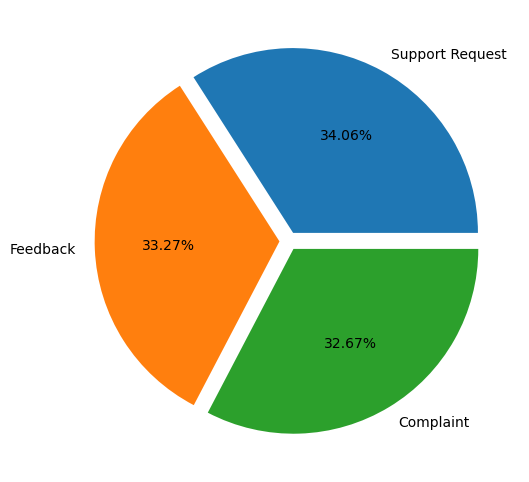

In [39]:
Pie('interaction_type')

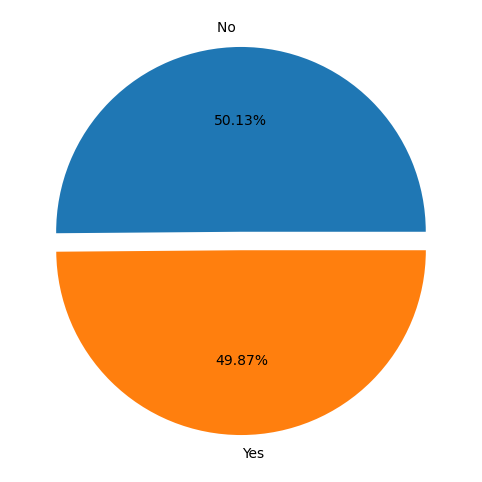

In [40]:
Pie('follow_up_required')

In [42]:
def SelectedFeaturePie(feature,Feature,Values,Limit=10) : 
    global data_interaction
    i=1
    fig= plt.subplots(figsize=(20,4))
    for index in Values:
        plt.subplot(1,3,i)
        plt.title(index)
        Data = data_interaction[data_interaction[Feature]==index]
        plt.pie(Data[feature].value_counts()[:Limit],labels=list(
            Data[feature].value_counts()[:Limit].index),
            autopct ='%1.2f%%' , labeldistance = 1.1,
                explode = [0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )
        i+=1

    plt.show()   

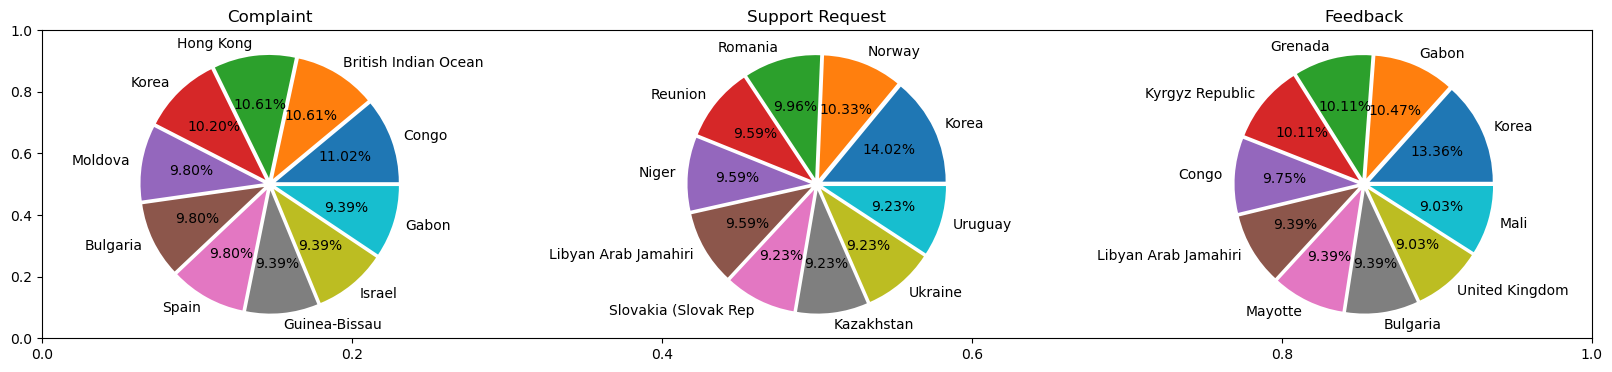

In [44]:
SelectedFeaturePie('country','interaction_type',['Complaint','Support Request','Feedback'])

In [45]:
query = '''select *
 from The_address ta join Interaction I 
 on ta.customer_id=I.customer_id
 where follow_up_required='yes'
 '''

# Load data into a pandas DataFrame
data_interaction_with_yes = pd.read_sql(query, engine)

data_interaction_with_yes

,country,government,city,customer_id,Interaction_id,interaction_type,interaction_outcome,follow_up_required,interaction_channel,follow_up_date,customer_id
0,Afghanistan,Alabama,Deborahbury,2923,3917,Complaint,Unresolved,Yes,Chat,2024-10-15,2923
1,Afghanistan,Alabama,Deborahbury,2923,8541,Feedback,Implemented,Yes,Email,2024-10-16,2923
2,Afghanistan,California,Lake Joshua,3368,9211,Support Request,Pending,Yes,Chat,2024-10-27,3368
3,Afghanistan,Delaware,Rossmouth,9490,6158,Complaint,Implemented,Yes,Email,2024-10-31,9490
4,Afghanistan,Delaware,Rossmouth,9490,7778,Feedback,Pending,Yes,Email,2024-10-27,9490
...,...,...,...,...,...,...,...,...,...,...,...
5458,Zimbabwe,Oregon,Pattonborough,10895,5586,Feedback,Implemented,Yes,Email,2024-10-10,10895
5459,Zimbabwe,Rhode Island,Allisonfurt,7368,4356,Feedback,Unresolved,Yes,Phone,2024-10-07,7368
5460,Zimbabwe,Rhode Island,Allisonfurt,7368,5067,Support Request,Unresolved,Yes,Email,2024-10-16,7368
5461,Zimbabwe,Texas,Andreaport,2200,581,Support Request,Resolved,Yes,Phone,2024-11-02,2200


In [47]:
def Pie(feature,Limit=10) : 
    global data_interaction_with_yes
    fig = plt.subplots(figsize=(10,6))
    plt.pie(data_interaction_with_yes[feature].value_counts()[:Limit]
            ,labels=list(data_interaction_with_yes[feature].value_counts()[:Limit].index),
            autopct ='%1.2f%%' ,
            labeldistance = 1.1,
            explode = [0.05 for i in range(len(data_interaction_with_yes[feature].value_counts()[:Limit]))] )
    plt.show()


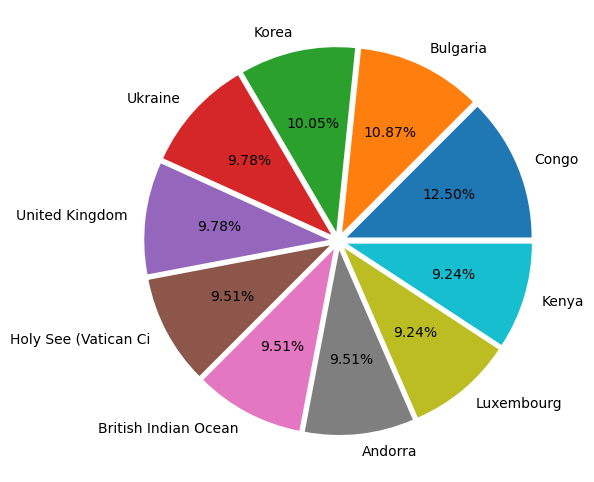

In [48]:
#the most country have follow_up_required
Pie('country')

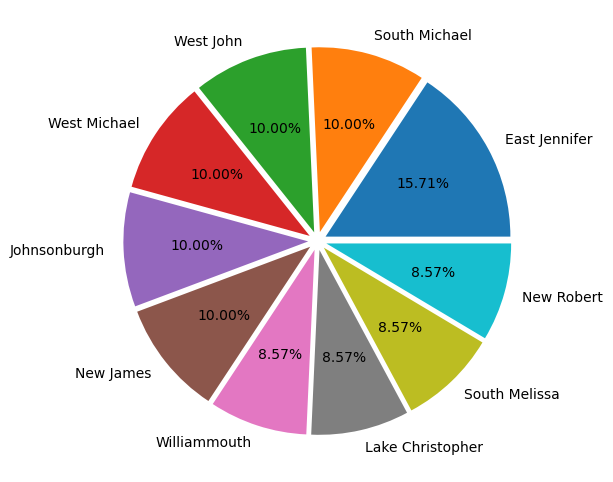

In [49]:
Pie('city')

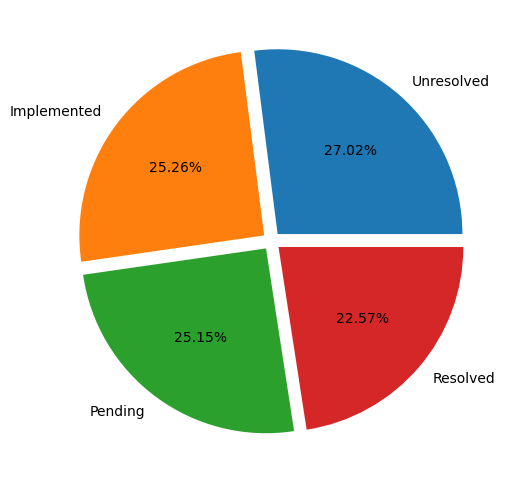

In [54]:
Pie('interaction_outcome')

In [62]:
data

,Transaction_id,amount,currency,Transaction_type,payment_method,payment_status,customer_id,Transaction_Date,country,government,city,customer_id,months
0,1,4336,GBP,Refund,PayPal,Completed,3991,2020-10-16,Croatia,Nebraska,Lake Jeffreyborough,3991,october
1,1,4336,GBP,Refund,PayPal,Completed,3991,2020-10-16,Malaysia,Massachusetts,Briantown,3991,october
2,3,1164,USD,Purchase,Debit Card,Completed,565,2022-12-30,Lao People's Democra,Delaware,Schroederfurt,565,december
3,3,1164,USD,Purchase,Debit Card,Completed,565,2022-12-30,Madagascar,Alabama,Davidburgh,565,december
4,3,1164,USD,Purchase,Debit Card,Completed,565,2022-12-30,Palestinian Territor,Minnesota,Webbside,565,december
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11000,10999,792,EUR,Refund,Credit Card,Completed,5447,2021-03-20,Saint Kitts and Nevi,Montana,South Riley,5447,march
11001,10999,792,EUR,Refund,Credit Card,Completed,5447,2021-03-20,San Marino,Massachusetts,West Jasmine,5447,march
11002,11000,460,EUR,Purchase,Debit Card,Refunded,9429,2024-05-08,Malaysia,Kansas,West Kristinville,9429,may
11003,11000,460,EUR,Purchase,Debit Card,Refunded,9429,2024-05-08,Moldova,Virginia,Floreschester,9429,may


In [65]:
query = ''' 
exec Model_Data
 '''
# Load data into pandas
LastTransDate = pd.read_sql(query, engine)
LastTransDate 

,customer_id,interaction_type,interaction_outcome,payment_method,payment_status,Transaction_type,TheLastTransDate
0,1552,Feedback,Pending,Debit Card,Pending,Refund,2020-01-01
1,1552,Feedback,Pending,PayPal,Pending,Purchase,2020-01-01
2,5136,Complaint,Pending,Credit Card,Completed,Purchase,2020-01-02
3,5653,Feedback,Implemented,Credit Card,Refunded,Refund,2020-01-02
4,9004,Complaint,Implemented,PayPal,Completed,Purchase,2020-01-02
...,...,...,...,...,...,...,...
10184,10043,Feedback,Implemented,Debit Card,Refunded,Refund,2024-10-05
10185,10043,Feedback,Pending,Credit Card,Pending,Purchase,2024-10-05
10186,10043,Feedback,Pending,Debit Card,Refunded,Refund,2024-10-05
10187,7677,Complaint,Pending,Debit Card,Refunded,Purchase,2024-10-05


In [72]:
df = pd.DataFrame(LastTransDate)

df['TheLastTransDate'] = pd.to_datetime(df['TheLastTransDate'])

current_date = datetime.now()
df['Months_Since_Last_Transaction'] = (current_date.year - df['TheLastTransDate'].dt.year) * 12 + (current_date.month - df['TheLastTransDate'].dt.month)
df['Target'] = df['Months_Since_Last_Transaction'].apply(lambda x: 1 if x <= 12 else 0)

# Display the updated DataFrame
df

,customer_id,interaction_type,interaction_outcome,payment_method,payment_status,Transaction_type,TheLastTransDate,Months_Since_Last_Transaction,Target
0,1552,Feedback,Pending,Debit Card,Pending,Refund,2020-01-01,57,0
1,1552,Feedback,Pending,PayPal,Pending,Purchase,2020-01-01,57,0
2,5136,Complaint,Pending,Credit Card,Completed,Purchase,2020-01-02,57,0
3,5653,Feedback,Implemented,Credit Card,Refunded,Refund,2020-01-02,57,0
4,9004,Complaint,Implemented,PayPal,Completed,Purchase,2020-01-02,57,0
...,...,...,...,...,...,...,...,...,...
10184,10043,Feedback,Implemented,Debit Card,Refunded,Refund,2024-10-05,0,1
10185,10043,Feedback,Pending,Credit Card,Pending,Purchase,2024-10-05,0,1
10186,10043,Feedback,Pending,Debit Card,Refunded,Refund,2024-10-05,0,1
10187,7677,Complaint,Pending,Debit Card,Refunded,Purchase,2024-10-05,0,1


In [73]:
data=pd.DataFrame(df)
df.to_csv('Model_Data2.csv', index=False)